In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

In [95]:
df_train_stops = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')

In [96]:
df_train_stops.head()

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude
0,1,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575


In [97]:
len(df_train_stops['Stop Name'].unique())

376

### Making a df from turnstile data

In [5]:
dates = ['170624', '170617', '170610', '170603', '170527', '170520', '170513', '170506', '160625', '160618', '160611', '160604', '160528', '160521', '160514', '160507']

chronological_dates = list(reversed(dates))

In [33]:
turnstile_df = pd.DataFrame()

for date in chronological_dates:
    base = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_'
    url = base + date + '.txt'
    print(url)
    df = pd.read_csv(url)
    turnstile_df = pd.concat([turnstile_df, df], ignore_index=True)

http://web.mta.info/developers/data/nyct/turnstile/turnstile_160507.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160514.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160521.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160528.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160604.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160611.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160618.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_160625.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170506.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170513.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170520.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170527.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170603.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_170

In [98]:
turnstile_df.head(6)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197
5,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,20:00:00,REGULAR,5640802,1910254


In [99]:
len(turnstile_df['STATION'].unique())

380

In [101]:
turnstile_df.groupby(['STATION', 'DATE', 'SCP']).head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197
6,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,00:00:00,REGULAR,5640974,1910328
7,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,04:00:00,REGULAR,5640996,1910333
8,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,08:00:00,REGULAR,5641021,1910358
9,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,12:00:00,REGULAR,5641113,1910427
10,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,16:00:00,REGULAR,5641329,1910508


In [10]:
for item in turnstile_df['STATION'].str.lower().unique():
    if item not in df_train_stops['Stop Name'].str.lower().unique():
        print(item)

57 st-7 av
times sq-42 st
34 st-herald sq
14 st-union sq
8 st-nyu
whitehall s-fry
delancey/essex
park place
beverley road
jay st-metrotec
atl av-barclay
4av-9 st
ft hamilton pky
coney is-stillw
w 8 st-aquarium
myrtle-wyckoff
bushwick av
new lots
east 105 st
canarsie-rockaw
howard bch jfk
jfk jamaica ct1
75 st-elderts
85 st-forest pk
knickerbocker
seneca ave
forest ave
inwood-207 st
163 st-amsterdm
81 st-museum
59 st columbus
42 st-port auth
34 st-penn sta
w 4 st-wash sq
world trade ctr
hoyt-scher
clinton-wash av
kingston-throop
van siclen ave
ozone pk leffrt
aqueduct n.cond
aqueduct racetr
rockaway park b
far rockaway
161/yankee stad
bedford pk blvd
norwood 205 st
lexington av/53
court sq-23 st
jksn ht-roosvlt
grand-newtown
63 dr-rego park
forest hills 71
kew gardens
briarwood
jamaica 179 st
nassau st
myrtle-willough
bedford-nostran
47-50 sts rock
42 st-bryant pk
b'way-lafayette
smith-9 st
4 av-9 st
15 st-prospect
lexington av/63
roosevelt islnd
21 st-qnsbridge
jamaica van wk
sutphin-a

In [12]:
turnstile_df[turnstile_df['STATION'].str.lower() == 'st. george'].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
192645,S101,R070,00-00-00,ST. GEORGE,1,SRT,04/30/2016,00:00:00,REGULAR,859377,158
192646,S101,R070,00-00-00,ST. GEORGE,1,SRT,04/30/2016,04:00:00,REGULAR,859379,158
192647,S101,R070,00-00-00,ST. GEORGE,1,SRT,04/30/2016,08:00:00,REGULAR,859399,158
192648,S101,R070,00-00-00,ST. GEORGE,1,SRT,04/30/2016,12:00:00,REGULAR,859433,158
192649,S101,R070,00-00-00,ST. GEORGE,1,SRT,04/30/2016,16:00:00,REGULAR,859468,158


In [11]:
df_train_stops[df_train_stops['Stop Name'].str.contains('Norwood')]

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude
87,88,88,J21,BMT,Jamaica,Norwood Av,Bk,J Z,Elevated,40.681410,-73.880039
208,210,210,D01,IND,Concourse,Norwood - 205 St,Bx,D,Subway,40.874811,-73.878855


In [16]:
col_names = turnstile_df.columns
for col in col_names:
    if turnstile_df[col].dtype == 'object':
        print(col)

C/A
UNIT
SCP
STATION
LINENAME
DIVISION
DATE
TIME
DESC


### Get and Compute the total number of people in and out of each station, each day.

In [15]:
def ppl_per_day_turnst(dt, dataframe):

'''function to subtract the starting number (at 00:00:00 hrs) from the end-of-day (at 20:00:00 hrs) number 
for each turnstile
----------
dt = list of dates to get numbers for
dataframe = dataframe from MTA turnstile data


'''
    date = dt[0]
    
    time00 = (turnstile_df.loc[(turnstile_df.DATE == '09/09/2017') & (turnstile_df.TIME == '00:00:00'), :]) #get rows for start of day
    time20 = (turnstile_df.loc[(turnstile_df.DATE == '09/09/2017') & (turnstile_df.TIME == '20:00:00'), :])  # get rows for end of day
    print(len(time00))
    print(len(time20))
    #print(time20.SCP.iloc[2])
    pplDelta = pd.Series(range(len(time20)))  #create data frame
    for row in range(len(time20)): 
        if time20.SCP.iloc[row] == time00.SCP.iloc[row]:  # if the SCP col is the same = same turnstyle
            pplDelta[row] = int(time20.ENTRIES.iloc[row]) - int(time00.ENTRIES.iloc[row])  #subtract numb from start of day from end of day for each turnstyle
        else:
            continue  # skip if if there's not a pair of numbers for a turn style
    print(len(pplDelta)) 

SyntaxError: invalid syntax (<ipython-input-15-1719be995850>, line 1)

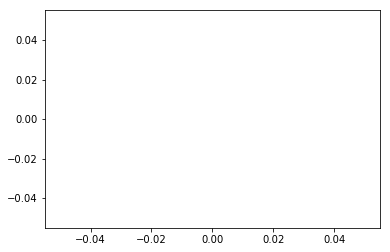

In [14]:
plt.plot(range(len(time00)),pplDelta)

### Extract columns of interest and determine which stations have the highest traffic

In [41]:
%%capture
turnstile_df.rename(columns=lambda x: x.strip(), inplace=True)

In [42]:
turnstile_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197


In [70]:
turnstile_extract_data_df = turnstile_df[['DATE', 'STATION', 'SCP', 'ENTRIES', 'EXITS', 'TIME']]

In [57]:
def find_busiest_stations(number, turnstile_df):
    """
    Takes a dataframe and a number n of desired stations and outputs the n busiest stations
    ---
    INPUTS: number, the number of top busiest stations desired and turnstile_df which contains all entrances and exits by day
    OUTPUT: a data frame
    """
    turnstile_extract_data_df = turnstile_df[['DATE', 'STATION', 'SCP', 'ENTRIES', 'EXITS', 'TIME']]
    return turnstile_extract_data_df.groupby('STATION').sum().sort_values('ENTRIES', ascending=False).iloc[:number]

find_busiest_stations(5, turnstile_df)
    

,ENTRIES,EXITS
STATION,,
42 ST-PORT AUTH,5341669118473,4347357767216
125 ST,4660910138131,2661216121046
23 ST,4451821511571,4423832431362
TIMES SQ-42 ST,3938636734258,3071376395298
57 ST-7 AV,3908118795682,3199981028471


In [68]:
turnstile_extract_data_df.groupby(['DATE', 'STATION']).sum().reset_index()

,DATE,STATION,ENTRIES,EXITS
0,2016-04-30,1 AV,9365210271,20854612574
1,2016-04-30,103 ST,892638599,3544368714
2,2016-04-30,103 ST-CORONA,378975718,362039578
3,2016-04-30,104 ST,23169535488,19004122751
4,2016-04-30,110 ST,159862081,162864019
5,2016-04-30,111 ST,673600452,356017489
6,2016-04-30,116 ST,10276594732,12442349367
7,2016-04-30,116 ST-COLUMBIA,7265898961,1539554961
8,2016-04-30,121 ST,48384391,39860241
9,2016-04-30,125 ST,41489443857,23643722474


In [71]:
turnstile_extract_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3127257 entries, 0 to 3127256
Data columns (total 6 columns):
DATE       object
STATION    object
SCP        object
ENTRIES    int64
EXITS      int64
TIME       object
dtypes: int64(2), object(4)
memory usage: 143.2+ MB


In [74]:
turnstile_extract_data_df['DATE'] = pd.to_datetime(turnstile_extract_data_df['DATE'], format='%m/%d/%Y')

/Users/murdock/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [75]:
turnstile_extract_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3127257 entries, 0 to 3127256
Data columns (total 6 columns):
DATE       datetime64[ns]
STATION    object
SCP        object
ENTRIES    int64
EXITS      int64
TIME       object
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 143.2+ MB


In [76]:
turnstile_extract_data_df.head()

,DATE,STATION,SCP,ENTRIES,EXITS,TIME
0,2016-04-30,59 ST,02-00-00,5639941,1909983,00:00:00
1,2016-04-30,59 ST,02-00-00,5639991,1909993,04:00:00
2,2016-04-30,59 ST,02-00-00,5640014,1910024,08:00:00
3,2016-04-30,59 ST,02-00-00,5640158,1910134,12:00:00
4,2016-04-30,59 ST,02-00-00,5640454,1910197,16:00:00


In [78]:
turnstile_extract_data_df['weekday'] = turnstile_extract_data_df['DATE'].dt.dayofweek

/Users/murdock/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [80]:
 turnstile_extract_data_df.head(20)

,DATE,STATION,SCP,ENTRIES,EXITS,TIME,weekday
0,2016-04-30,59 ST,02-00-00,5639941,1909983,00:00:00,5
1,2016-04-30,59 ST,02-00-00,5639991,1909993,04:00:00,5
2,2016-04-30,59 ST,02-00-00,5640014,1910024,08:00:00,5
3,2016-04-30,59 ST,02-00-00,5640158,1910134,12:00:00,5
4,2016-04-30,59 ST,02-00-00,5640454,1910197,16:00:00,5
5,2016-04-30,59 ST,02-00-00,5640802,1910254,20:00:00,5
6,2016-05-01,59 ST,02-00-00,5640974,1910328,00:00:00,6
7,2016-05-01,59 ST,02-00-00,5640996,1910333,04:00:00,6
8,2016-05-01,59 ST,02-00-00,5641021,1910358,08:00:00,6
9,2016-05-01,59 ST,02-00-00,5641113,1910427,12:00:00,6


In [81]:
turnstile_extract_data_df.groupby(['STATION', 'weekday']).sum()

ENTRIES         EXITS
STATION         weekday                            
1 AV            0        152302745623  204571999561
                1        154902528185  210930240474
                2        152980833976  207177173728
                3        148728752197  191579023585
                4        146726274802  187669193131
                5        140273621775  201215640558
                6        143966996335  202002776573
103 ST          0         14563493528   59697959977
                1         14246386636   57002045292
                2         15188437219   66142710209
                3         14130045431   57969728231
                4         13469438559   54568747737
                5         14233839770   57489204515
                6         14668091085   60767196893
103 ST-CORONA   0          6426241362    6058062757
                1          6607951134    6233261299
                2          6563211796    6186420639
                3          6572109704    6192918887
                4          6557958082    6183973374
                5          6423491376    6056034809
                6          6484864550    6116655476
104 ST          0        417898084450  321102626192
                1        414745621912  318568288118
                2        405268944068  310947114433
                3        386526727388  298892362653
                4        388557091484  304610949895
                5        411587831908  316028947306
                6        417902214505  321107222684
110 ST          0          2803518027    2820367777
                1          2877220449    2956535888
...                               ...           ...
WOODHAVEN BLVD  5         16616174371    9758573747
                6         16594046953    9751233818
WOODLAWN        0          2797939981    1120990497
                1          2798675619    1121153717
                2          2799450021    1121332790
                3          2787260795    1112916312
                4          2892396753    1157650349
                5          2796985099    1120752378
                6          2797407533    1120873842
WORLD TRADE CTR 0          3573374779    1806914976
                1          3537693639    1789232089
                2          3569236730    1805114886
                3          3580558810    1809703980
                4          3571392604    1803896626
                5          3573221350    1806085805
                6          3574014257    1806569658
YORK ST         0          3269888512    2924777301
                1          3308906281    2954254055
                2          3267627490    2920432926
                3          3246415367    2896495251
                4          3295881931    2931838897
                5          3342538546    2984277343
                6          3278221186    2925680715
ZEREGA AV       0          5276126159     101060852
                1          5168689189      99189358
                2          5222908408     100814127
                3          5169227750      99670830
                4          5169490519      99907359
                5          5115605012      99532020
                6          5169175495     100272689

[2660 rows x 2 columns]